# NIPS - DEMO

In [1]:
from scontrol import random_rct, diagnostic, fill_tensor
import matplotlib.pyplot as plt

## 1 - Input

In [2]:
rct_data = random_rct(N = 100, I = 4, T = 100, T0 = 40, rank = 2, sigma = 0)#Change sigma for unperfect decisions
pre_df, post_df = rct_data

In [3]:
pre_df.head()

,unit,intervention,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,...,t_30,t_31,t_32,t_33,t_34,t_35,t_36,t_37,t_38,t_39
0,id_0,inter_0,-0.423774,-0.494301,0.287862,0.794135,0.703389,1.443480,2.005977,0.181178,...,0.221226,-0.909319,-0.192832,0.241675,0.934950,2.180082,1.362381,0.912637,-1.695110,-0.041454
1,id_1,inter_0,0.180689,0.207895,-0.120961,-0.332254,-0.291631,-0.602436,-0.832211,-0.074186,...,-0.089858,0.371705,0.079100,-0.099204,-0.387189,-0.898573,-0.566257,-0.374970,0.700357,0.014324
2,id_2,inter_0,0.012940,0.016851,-0.009880,-0.028142,-0.026555,-0.052070,-0.075416,-0.007411,...,-0.009495,0.037583,0.007801,-0.009735,-0.035573,-0.085559,-0.050574,-0.036550,0.065498,0.003321
3,id_3,inter_0,-0.314200,-0.361747,0.210487,0.578287,0.507807,1.048663,1.449058,0.129257,...,0.156626,-0.647692,-0.137806,0.172825,0.674237,1.565110,0.985885,0.653216,-1.219719,-0.025187
4,id_4,inter_0,0.155493,0.177464,-0.103199,-0.282730,-0.246800,-0.511874,-0.704546,-0.062299,...,-0.075080,0.311819,0.066500,-0.083438,-0.327435,-0.757694,-0.479935,-0.315560,0.591427,0.010640


In [4]:
post_df.head()

,unit,intervention,t_40,t_41,t_42,t_43,t_44,t_45,t_46,t_47,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,id_0,inter_0,1.104995,-2.635821,2.371194,3.119528,-0.260316,1.387496,-0.084933,1.212881,...,0.357135,-0.506365,-0.724203,0.537365,-2.504476,1.244686,1.034611,3.052676,1.755217,0.213126
1,id_1,inter_3,0.419965,1.013813,1.128511,0.311776,-0.852765,-0.334450,1.376074,-0.536151,...,1.860624,1.482615,0.084801,-1.341813,-0.335043,1.378947,-0.939516,0.847132,0.086999,0.564423
2,id_2,inter_2,-0.021020,0.019759,-0.048534,-0.046171,0.016315,-0.013404,-0.019614,-0.008042,...,-0.032795,-0.015617,0.008349,0.013083,0.038345,-0.037333,0.000408,-0.053352,-0.024645,-0.011341
3,id_3,inter_0,0.799535,-1.896781,1.716886,2.252669,-0.192247,0.999494,-0.054184,0.872450,...,0.267315,-0.357740,-0.522149,0.380837,-1.808966,0.905288,0.741728,2.207192,1.267019,0.156706
4,id_4,inter_3,0.391475,0.929316,1.050179,0.297439,-0.789034,-0.305040,1.271737,-0.492002,...,1.720946,1.368970,0.076240,-1.238726,-0.317123,1.278334,-0.865385,0.792103,0.085621,0.522362


## 2 - Diagnostic

In [5]:
diagnostic(rct_data,rank=2)

,intervention,cum. energy at 2 (%),Valid (>90)
0,inter_0,100.0,True
1,inter_1,100.0,True
2,inter_2,100.0,True
3,inter_3,100.0,True


## 3 - Output

In [6]:
r = 2
full_matrix_denoise = False

In [7]:
pre_df.unit.unique()

array(['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7',
       'id_8', 'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21',
       'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'id_39', 'id_40', 'id_41', 'id_42',
       'id_43', 'id_44', 'id_45', 'id_46', 'id_47', 'id_48', 'id_49',
       'id_50', 'id_51', 'id_52', 'id_53', 'id_54', 'id_55', 'id_56',
       'id_57', 'id_58', 'id_59', 'id_60', 'id_61', 'id_62', 'id_63',
       'id_64', 'id_65', 'id_66', 'id_67', 'id_68', 'id_69', 'id_70',
       'id_71', 'id_72', 'id_73', 'id_74', 'id_75', 'id_76', 'id_77',
       'id_78', 'id_79', 'id_80', 'id_81', 'id_82', 'id_83', 'id_84',
       'id_85', 'id_86', 'id_87', 'id_88', 'id_89', 'id_90', 'id_91',
       'id_92', 'id_93', 'id_94', 'id_95', 'id_96', 'id_97', 'id_98',
       'id_99'], dtyp

In [8]:
df_output = fill_tensor(rct_data, rank=r, full_matrix_denoise=False)
df_output.head()

anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
anish
anish
anish
anish
anish
anish
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
anish
anish
anish
anish
anish
anish
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
(22, 42)
(22, 62)
(21, 40)
(21, 60)
anish
anish
anish
anish
anish
anish
anish
(22, 42)
(22, 62

,unit,intervention,t_40,t_41,t_42,t_43,t_44,t_45,t_46,t_47,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,id_0,inter_0,1.104995,-2.635821,2.371194,3.119528,-0.260316,1.387496,-0.084933,1.212881,...,0.357135,-0.506365,-0.724203,0.537365,-2.504476,1.244686,1.034611,3.052676,1.755217,0.213126
1,id_0,inter_1,-3.393288,4.028166,-7.740178,-7.816842,2.320110,-2.522320,-2.580281,-1.713083,...,-4.576370,-1.824164,1.497609,1.468692,6.446600,-5.649734,-0.488604,-8.742788,-4.219805,-1.629699
2,id_0,inter_2,-0.594984,-2.795690,-1.752118,0.147636,1.716558,1.055044,-2.899384,1.432080,...,-3.799351,-3.230204,-0.362965,2.943708,0.058673,-2.564577,2.229892,-0.989024,0.267977,-1.125678
3,id_0,inter_3,-0.844782,-2.112610,-2.278321,-0.595386,1.742786,0.704092,-2.819241,1.114745,...,-3.805446,-3.043250,-0.183670,2.755330,0.651532,-2.806755,1.938334,-1.692668,-0.153914,-1.152939
4,id_1,inter_0,-0.459222,1.089128,-0.986147,-1.293711,0.110534,-0.573938,0.030906,-0.500949,...,-0.153799,0.205216,0.299847,-0.218501,1.038905,-0.520101,-0.425816,-1.267677,-0.727637,-0.090080


In [71]:
unit = 'id_1'
inter_obs = 'inter_3'

y = post_df.loc[(post_df.unit==unit) & (post_df.intervention==inter_obs)].drop(columns=['unit', 'intervention']).values
y_hat = df_output.loc[(df_output.unit==unit) & (df_output.intervention==inter_obs)].drop(columns=['unit', 'intervention']).values


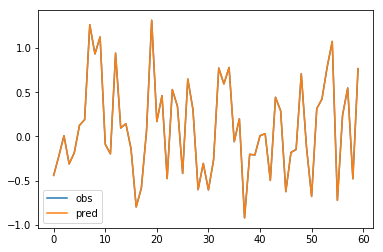

In [73]:
plt.figure()
plt.plot(y.flatten(), label='obs')
plt.plot(y_hat.flatten(), label='pred')
plt.legend(loc='best')
plt.show()

In [74]:
y

array([[-0.44129865, -0.22331055,  0.00766487, -0.31152009, -0.18491712,
         0.12456768,  0.18920224,  1.26467568,  0.93362365,  1.12527379,
        -0.0889443 , -0.19700159,  0.94203934,  0.09485563,  0.14391937,
        -0.14265805, -0.79888838, -0.58428814,  0.06244599,  1.31449849,
         0.16814163,  0.4616118 , -0.47742747,  0.5299841 ,  0.33975419,
        -0.41996957,  0.6494295 ,  0.3043187 , -0.60258921, -0.30588078,
        -0.60590677, -0.26464365,  0.7730659 ,  0.59392725,  0.77970799,
        -0.05990603,  0.19939078, -0.92278124, -0.20270385, -0.21079522,
         0.00740001,  0.03049047, -0.49857246,  0.44256837,  0.29004188,
        -0.62554631, -0.18136261, -0.14846982,  0.70872152, -0.11587733,
        -0.67987368,  0.31438471,  0.42158331,  0.77874586,  1.07498475,
        -0.72390383,  0.23974706,  0.54780994, -0.47996723,  0.76658745]])

In [75]:
y_hat

array([[-0.44129865, -0.22331055,  0.00766487, -0.31152009, -0.18491712,
         0.12456768,  0.18920224,  1.26467568,  0.93362365,  1.12527379,
        -0.0889443 , -0.19700159,  0.94203934,  0.09485563,  0.14391937,
        -0.14265805, -0.79888838, -0.58428814,  0.06244599,  1.31449849,
         0.16814163,  0.4616118 , -0.47742747,  0.5299841 ,  0.33975419,
        -0.41996957,  0.6494295 ,  0.3043187 , -0.60258921, -0.30588078,
        -0.60590677, -0.26464365,  0.7730659 ,  0.59392725,  0.77970799,
        -0.05990603,  0.19939078, -0.92278124, -0.20270385, -0.21079522,
         0.00740001,  0.03049047, -0.49857246,  0.44256837,  0.29004188,
        -0.62554631, -0.18136261, -0.14846982,  0.70872152, -0.11587733,
        -0.67987368,  0.31438471,  0.42158331,  0.77874586,  1.07498475,
        -0.72390383,  0.23974706,  0.54780994, -0.47996723,  0.76658745]])

In [25]:
inter = 'inter_1'
filter_inter = (post_df["intervention"] == inter)
filter_inter

0     False
1     False
2     False
3     False
4      True
      ...  
95    False
96    False
97    False
98     True
99    False
Name: intervention, Length: 100, dtype: bool

In [26]:
pre_df[filter_inter]

,unit,intervention,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,...,t_30,t_31,t_32,t_33,t_34,t_35,t_36,t_37,t_38,t_39
4,id_4,inter_0,-0.648097,2.378631,7.556106,-3.863612,-4.890526,-0.827802,-0.549629,2.678667,...,-10.038523,1.977742,-6.039265,1.584643,0.799340,6.071969,-6.154138,-3.243124,4.218996,2.171668
7,id_7,inter_0,-0.236353,0.828565,2.633165,-1.349217,-1.700471,-0.288424,-0.202641,0.937918,...,-3.497358,0.688409,-2.098782,0.559018,0.282882,2.119489,-2.134792,-1.136574,1.483614,0.759890
8,id_8,inter_0,-0.027681,0.149698,0.474183,-0.238975,-0.311590,-0.052011,-0.020757,0.162594,...,-0.631061,0.125100,-0.386157,0.091036,0.044811,0.376695,-0.398339,-0.195601,0.248225,0.132445
10,id_10,inter_0,0.068841,-0.227906,-0.724679,0.372339,0.466622,0.079360,0.059780,-0.259734,...,0.962196,-0.189171,0.575519,-0.156304,-0.079415,-0.584580,0.583977,0.315112,-0.413138,-0.210251
11,id_11,inter_0,0.409933,-1.547666,-4.915194,2.510126,3.185455,0.538535,0.345213,-1.737517,...,6.530970,-1.287392,3.934923,-1.023259,-0.515166,-3.945871,4.014107,2.102526,-2.729597,-1.409214
16,id_16,inter_0,0.018938,-0.018696,-0.060824,0.034783,0.034418,0.006598,0.018932,-0.027378,...,0.079651,-0.014878,0.041048,-0.021637,-0.012087,-0.053473,0.036719,0.034472,-0.051429,-0.021535
18,id_18,inter_0,-0.454381,1.669295,5.302737,-2.711294,-3.432241,-0.580939,-0.385253,1.879652,...,-7.044889,1.387977,-4.238489,1.111788,0.560780,4.261050,-4.319274,-2.275696,2.960252,1.523907
21,id_21,inter_0,-0.187275,0.639996,2.034385,-1.043658,-1.312101,-0.222814,-0.161496,0.726614,...,-2.701667,0.531511,-1.618946,0.434919,0.220478,1.639082,-1.644980,-0.880964,1.152183,0.588470
25,id_25,inter_0,0.269008,-0.964000,-3.062958,1.567850,1.980163,0.335530,0.229453,-1.088497,...,4.068705,-0.801223,2.444618,-0.646428,-0.326615,-2.463454,2.488773,1.318477,-1.718232,-0.882171
27,id_27,inter_0,0.028268,-0.176916,-0.559939,0.281008,0.369535,0.061438,0.019838,-0.190126,...,0.745561,-0.148060,0.458430,-0.104639,-0.051095,-0.443340,0.474508,0.228282,-0.287492,-0.155093


In [57]:
import numpy as np
import pandas as pd

test_unit = 'id_4'
test_inter = 'inter_1'

In [58]:
filter_inter = (post_df["intervention"] == test_inter)

In [59]:
test_unit in post_df[filter_inter].unit.values

True

In [60]:
X1 = pre_df[filter_inter]
X2 = post_df[filter_inter]

In [61]:
X1.head()

,unit,intervention,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,...,t_30,t_31,t_32,t_33,t_34,t_35,t_36,t_37,t_38,t_39
4,id_4,inter_0,-0.648097,2.378631,7.556106,-3.863612,-4.890526,-0.827802,-0.549629,2.678667,...,-10.038523,1.977742,-6.039265,1.584643,0.799340,6.071969,-6.154138,-3.243124,4.218996,2.171668
7,id_7,inter_0,-0.236353,0.828565,2.633165,-1.349217,-1.700471,-0.288424,-0.202641,0.937918,...,-3.497358,0.688409,-2.098782,0.559018,0.282882,2.119489,-2.134792,-1.136574,1.483614,0.759890
8,id_8,inter_0,-0.027681,0.149698,0.474183,-0.238975,-0.311590,-0.052011,-0.020757,0.162594,...,-0.631061,0.125100,-0.386157,0.091036,0.044811,0.376695,-0.398339,-0.195601,0.248225,0.132445
10,id_10,inter_0,0.068841,-0.227906,-0.724679,0.372339,0.466622,0.079360,0.059780,-0.259734,...,0.962196,-0.189171,0.575519,-0.156304,-0.079415,-0.584580,0.583977,0.315112,-0.413138,-0.210251
11,id_11,inter_0,0.409933,-1.547666,-4.915194,2.510126,3.185455,0.538535,0.345213,-1.737517,...,6.530970,-1.287392,3.934923,-1.023259,-0.515166,-3.945871,4.014107,2.102526,-2.729597,-1.409214


In [63]:
X1.loc[(X1.unit != test_unit)].drop(columns=['unit', 'intervention']).values

array([[-2.36353211e-01,  8.28564584e-01,  2.63316544e+00,
        -1.34921688e+00, -1.70047089e+00, -2.88424019e-01,
        -2.02641103e-01,  9.37918162e-01,  1.90691925e+00,
         9.37933497e-01, -1.69743749e+00, -1.95950716e+00,
        -2.72078139e-01, -4.15058551e-01,  2.66293702e-01,
        -1.25633206e-01,  9.12580486e-01,  8.36774165e-01,
         5.61392331e-01,  1.49133962e+00, -1.29671777e+00,
        -2.52957141e-01, -5.30168292e-01, -1.09652814e+00,
        -9.06007554e-01,  7.21421961e-01,  4.10099967e-01,
        -1.50318194e+00, -4.93239548e-01, -1.20548768e+00,
        -3.49735796e+00,  6.88409345e-01, -2.09878250e+00,
         5.59017743e-01,  2.82882008e-01,  2.11948900e+00,
        -2.13479229e+00, -1.13657365e+00,  1.48361392e+00,
         7.59889611e-01],
       [-2.76805545e-02,  1.49697862e-01,  4.74182953e-01,
        -2.38974686e-01, -3.11590314e-01, -5.20105334e-02,
        -2.07565925e-02,  1.62593789e-01,  3.24030905e-01,
         1.85181678e-01, -3.05

In [39]:
'id_8' in post_df[filter_inter].unit.values

True

In [42]:
X1 = pre_df[filter_inter]

In [43]:
X1

,unit,intervention,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,...,t_30,t_31,t_32,t_33,t_34,t_35,t_36,t_37,t_38,t_39
4,id_4,inter_0,-0.648097,2.378631,7.556106,-3.863612,-4.890526,-0.827802,-0.549629,2.678667,...,-10.038523,1.977742,-6.039265,1.584643,0.799340,6.071969,-6.154138,-3.243124,4.218996,2.171668
7,id_7,inter_0,-0.236353,0.828565,2.633165,-1.349217,-1.700471,-0.288424,-0.202641,0.937918,...,-3.497358,0.688409,-2.098782,0.559018,0.282882,2.119489,-2.134792,-1.136574,1.483614,0.759890
8,id_8,inter_0,-0.027681,0.149698,0.474183,-0.238975,-0.311590,-0.052011,-0.020757,0.162594,...,-0.631061,0.125100,-0.386157,0.091036,0.044811,0.376695,-0.398339,-0.195601,0.248225,0.132445
10,id_10,inter_0,0.068841,-0.227906,-0.724679,0.372339,0.466622,0.079360,0.059780,-0.259734,...,0.962196,-0.189171,0.575519,-0.156304,-0.079415,-0.584580,0.583977,0.315112,-0.413138,-0.210251
11,id_11,inter_0,0.409933,-1.547666,-4.915194,2.510126,3.185455,0.538535,0.345213,-1.737517,...,6.530970,-1.287392,3.934923,-1.023259,-0.515166,-3.945871,4.014107,2.102526,-2.729597,-1.409214
16,id_16,inter_0,0.018938,-0.018696,-0.060824,0.034783,0.034418,0.006598,0.018932,-0.027378,...,0.079651,-0.014878,0.041048,-0.021637,-0.012087,-0.053473,0.036719,0.034472,-0.051429,-0.021535
18,id_18,inter_0,-0.454381,1.669295,5.302737,-2.711294,-3.432241,-0.580939,-0.385253,1.879652,...,-7.044889,1.387977,-4.238489,1.111788,0.560780,4.261050,-4.319274,-2.275696,2.960252,1.523907
21,id_21,inter_0,-0.187275,0.639996,2.034385,-1.043658,-1.312101,-0.222814,-0.161496,0.726614,...,-2.701667,0.531511,-1.618946,0.434919,0.220478,1.639082,-1.644980,-0.880964,1.152183,0.588470
25,id_25,inter_0,0.269008,-0.964000,-3.062958,1.567850,1.980163,0.335530,0.229453,-1.088497,...,4.068705,-0.801223,2.444618,-0.646428,-0.326615,-2.463454,2.488773,1.318477,-1.718232,-0.882171
27,id_27,inter_0,0.028268,-0.176916,-0.559939,0.281008,0.369535,0.061438,0.019838,-0.190126,...,0.745561,-0.148060,0.458430,-0.104639,-0.051095,-0.443340,0.474508,0.228282,-0.287492,-0.155093


In [13]:
unit = 'id_0'
inter_obs = 'inter_1'

y = post_df.loc[(post_df.unit==unit) & (post_df.intervention==inter_obs)].drop(columns=['unit', 'intervention']).values
y_hat = df_output.loc[(df_output.unit==unit) & (df_output.intervention==inter_obs)].drop(columns=['unit', 'intervention']).values


In [14]:
y

array([[ 0.10016334,  0.1912786 ,  0.00323205, -0.05228332,  0.15281524,
        -0.02954062,  0.08057917,  0.18202601, -0.05826482,  0.0138817 ,
         0.0723418 ,  0.13722045, -0.00818446,  0.1049423 , -0.17944904,
         0.22618655,  0.00946657,  0.04024451,  0.19736526, -0.0510441 ,
         0.03102151, -0.11506757, -0.15610537, -0.15776647,  0.1535257 ,
        -0.19820299,  0.1122305 , -0.01520635,  0.10193399,  0.1713281 ,
        -0.01222161,  0.24137312, -0.06820793, -0.00221147,  0.25109647,
        -0.21959472, -0.17775986, -0.19932487, -0.40278302,  0.03278095,
         0.07439873,  0.20251003,  0.02231099,  0.12314742,  0.11609791,
         0.14625252,  0.00472319, -0.20979375, -0.02251538, -0.00273293,
        -0.10738325, -0.18708023, -0.16993909, -0.23003251,  0.07077189,
        -0.14602721, -0.16125574, -0.20911823,  0.11691945, -0.01764188]])

In [15]:
y_hat

array([[ 0.10016334,  0.1912786 ,  0.00323205, -0.05228332,  0.15281524,
        -0.02954062,  0.08057917,  0.18202601, -0.05826482,  0.0138817 ,
         0.0723418 ,  0.13722045, -0.00818446,  0.1049423 , -0.17944904,
         0.22618655,  0.00946657,  0.04024451,  0.19736526, -0.0510441 ,
         0.03102151, -0.11506757, -0.15610537, -0.15776647,  0.1535257 ,
        -0.19820299,  0.1122305 , -0.01520635,  0.10193399,  0.1713281 ,
        -0.01222161,  0.24137312, -0.06820793, -0.00221147,  0.25109647,
        -0.21959472, -0.17775986, -0.19932487, -0.40278302,  0.03278095,
         0.07439873,  0.20251003,  0.02231099,  0.12314742,  0.11609791,
         0.14625252,  0.00472319, -0.20979375, -0.02251538, -0.00273293,
        -0.10738325, -0.18708023, -0.16993909, -0.23003251,  0.07077189,
        -0.14602721, -0.16125574, -0.20911823,  0.11691945, -0.01764188]])

In [10]:
plt.figure()
plt.plot(y.flatten(), label='observed ' + inter)
for inter in interventions:
    y_hat = df_output.loc[(df_output.unit==unit) & (df_output.intervention==inter)].drop(columns=['unit', 'intervention']).values.flatten()
    plt.plot(y_hat, label='predicted ' + inter)
plt.legend(loc='best')
plt.show()

NameError: name 'inter' is not defined

<Figure size 432x288 with 0 Axes>

In [52]:
post_df[post_df.unit==unit]

,unit,intervention,t_40,t_41,t_42,t_43,t_44,t_45,t_46,t_47,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,id_0,inter_2,0.518328,-0.151997,2.766544,5.679066,4.591472,-2.894449,3.382344,0.783576,...,0.177292,3.807511,0.773902,-2.344053,2.385597,-3.268385,1.820112,-3.24074,-3.188453,4.869255


In [53]:
df_output[df_output.unit==unit]

,unit,intervention,t_40,t_41,t_42,t_43,t_44,t_45,t_46,t_47,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,id_0,inter_0,0.047887,-0.008561,0.333108,0.734143,0.601345,-0.374747,0.391012,0.081387,...,0.066351,0.469527,0.097755,-0.225689,0.289935,-0.376011,0.232679,-0.427219,-0.406410,0.593699
1,id_0,inter_1,0.135532,-0.043474,0.670652,1.342434,1.080040,-0.683806,0.830982,0.198768,...,0.012358,0.915460,0.184494,-0.606709,0.576471,-0.804228,0.432019,-0.760420,-0.757619,1.175338
2,id_0,inter_2,0.518328,-0.151997,2.766544,5.679066,4.591472,-2.894449,3.382344,0.783576,...,0.177292,3.807511,0.773902,-2.344053,2.385597,-3.268385,1.820112,-3.240740,-3.188453,4.869255
3,id_0,inter_3,-0.517086,0.242293,-1.477849,-2.200899,-1.650442,1.112199,-2.075427,-0.632922,...,0.649641,-1.850657,-0.337778,2.187449,-1.229769,2.035730,-0.748541,1.118940,1.331052,-2.478483


In [13]:
import numpy as np
import pandas as pd

In [14]:
interventions = np.sort(pd.unique(post_df.intervention))
units = np.sort(pre_df.unit)

In [15]:
inter = interventions[0]
filter_inter = (post_df["intervention"] == inter)
X1 = np.array(pre_df[filter_inter].drop(columns=["intervention","unit"]))

In [17]:
X1.shape

(18, 40)

In [20]:
unit = 0

In [21]:
y1 = np.array(pre_df[pre_df.index==unit].drop(columns=["intervention","unit"]))[0]

# get donor unit post-intervention measurements for intervention "inter"
X2 = np.array(post_df[filter_inter].drop(columns=["intervention","unit"]))

In [26]:
def pcr(X1, X2, y, rank=2, full_matrix_denoise=False):
    """
    Input:
        X (N,T)
        y (T)
    
    Output:
        beta (N) a linear model
    """
    if full_matrix_denoise:
    	X = hsvt(np.concatenate((X1, X2), axis=1), rank=rank)
    else:
    	X = hsvt(X1,rank=rank)
    _, n = X1.shape
    X_pre = X[:, :n]
    beta = np.linalg.pinv(X_pre.T).dot(y)
    return beta

def hsvt(Z, rank = 2):
    u, s, vh = np.linalg.svd(Z, full_matrices=False)
    s[rank:].fill(0)
    return np.dot(u*s,vh)

In [28]:
X_full = hsvt(np.concatenate((X1, X2), axis=1), rank=r)

In [30]:
X_pre = hsvt(X1,rank=r)

In [34]:
_, n = X1.shape
X_full[:, :n] - X_pre

array([[ 1.74860126e-15, -1.90819582e-16,  3.21964677e-15,
        -7.07767178e-16,  7.49400542e-16, -4.44089210e-15,
         2.05391260e-15, -1.08246745e-15,  9.43689571e-16,
        -1.47104551e-15, -1.08246745e-15, -1.44328993e-15,
        -1.64798730e-17, -1.76941795e-16, -2.77555756e-16,
        -3.81639165e-16, -2.15105711e-16,  3.33066907e-15,
        -3.16413562e-15,  2.77555756e-15, -1.59594560e-16,
        -2.33146835e-15,  1.16573418e-15, -7.21644966e-16,
        -1.72084569e-15,  2.05391260e-15,  5.55111512e-16,
         3.60822483e-16,  4.44089210e-15, -1.38777878e-16,
        -1.55431223e-15, -2.44249065e-15, -1.72084569e-15,
         4.57966998e-16, -1.72084569e-15,  3.55271368e-15,
         4.10782519e-15, -2.22044605e-16, -8.67361738e-17,
         3.66373598e-15],
       [ 5.32907052e-15, -3.33066907e-16,  2.22044605e-15,
        -5.55111512e-16,  5.55111512e-16, -1.77635684e-15,
         1.33226763e-15, -9.99200722e-16,  2.22044605e-16,
        -1.11022302e-15, -6.66

In [10]:
post_df[post_df.unit=='id_0']

,unit,intervention,t_40,t_41,t_42,t_43,t_44,t_45,t_46,t_47,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,id_0,inter_1,-1.55713,-1.525809,0.179947,1.911951,-2.274361,-2.724904,0.449726,-0.502344,...,-0.936931,2.084217,-0.300379,2.058454,2.441438,1.026175,-1.149924,0.032779,-1.013263,-0.660137


In [9]:
post_df.columns

Index(['unit', 'intervention', 't_40', 't_41', 't_42', 't_43', 't_44', 't_45',
       't_46', 't_47', 't_48', 't_49', 't_50', 't_51', 't_52', 't_53', 't_54',
       't_55', 't_56', 't_57', 't_58', 't_59', 't_60', 't_61', 't_62', 't_63',
       't_64', 't_65', 't_66', 't_67', 't_68', 't_69', 't_70', 't_71', 't_72',
       't_73', 't_74', 't_75', 't_76', 't_77', 't_78', 't_79', 't_80', 't_81',
       't_82', 't_83', 't_84', 't_85', 't_86', 't_87', 't_88', 't_89', 't_90',
       't_91', 't_92', 't_93', 't_94', 't_95', 't_96', 't_97', 't_98', 't_99'],
      dtype='object')

In [12]:
post_df['intervention']

0     inter_1
1     inter_2
2     inter_2
3     inter_0
4     inter_3
       ...   
95    inter_2
96    inter_2
97    inter_0
98    inter_3
99    inter_2
Name: intervention, Length: 100, dtype: object

In [16]:
import numpy as np
import pandas as pd

In [17]:
interventions = np.sort(pd.unique(post_df.intervention))

In [22]:
inter = interventions[0]

In [23]:
filter_inter = (post_df["intervention"] == inter)

In [24]:
filter_inter

0     False
1     False
2     False
3      True
4     False
      ...  
95    False
96    False
97     True
98    False
99    False
Name: intervention, Length: 100, dtype: bool

In [26]:
np.array(pre_df[filter_inter].drop(columns=["intervention","unit"])).shape

(22, 40)